### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

## GitHub URL:
https://github.com/GreatLearningAIML1/gl-pgp-aiml-uta-intl-may20-sgupta78 

#### 1. Import the necessary packages - 2.5 marks

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)
import warnings
warnings.filterwarnings('ignore')

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [21]:
data = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [22]:
# Checking Data.csv
print(data.info())
print()
print(data.shape)
print()
print(data.describe())
print()
print(data.isnull().sum())
print()
print(data.isnull().sum().sum())
print()

# Checking item.csv
print(movie.info())
print()
print(movie.shape)
print()
print(movie.describe())
print()
print(movie.isnull().sum())
print()
print(movie.isnull().sum().sum())
print()

# Checking item.csv
print(user.info())
print()
print(user.shape)
print()
print(user.describe())
print()
print(user.isnull().sum())
print()
print(user.isnull().sum().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
user id      100000 non-null int64
movie id     100000 non-null int64
rating       100000 non-null int64
timestamp    100000 non-null int64
dtypes: int64(4)
memory usage: 3.1 MB
None

(100000, 4)

            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00000     322.000000       4.000000  8.828269e+08
75%       682.00000     631.000000       4.000000  8.882600e+08
max       943.00000    1682.000000       5.000000  8.932866e+08

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

0

<class 'pandas.core.frame.DataFrame'>
Ra

#### 4. Find the number of movies per genre using the item data - 5 marks

In [23]:
# use sum on the default axis
movie.drop(['movie id','movie title', 'release date'], axis=1).sum()

unknown          1
Action         251
Adventure      135
Animation       42
Childrens      122
Comedy         505
Crime          109
Documentary     50
Drama          725
Fantasy         22
Film-Noir       24
Horror          92
Musical         56
Mystery         61
Romance        247
Sci-Fi         101
Thriller       251
War             71
Western         27
dtype: int64

#### 5. Find the movies that have more than one genre - 2.5 marks

In [24]:
#hint: use sum on the axis = 1
movie1 = movie[['movie id', 'movie title']]
movie1["Number of Genres"] =movie[['movie title', 'unknown', 'Action',
       'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
       'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']].sum(axis=1)
movie1[movie1['Number of Genres']>1]

,movie id,movie title,Number of Genres
0,1,Toy Story,3
1,2,GoldenEye,3
3,4,Get Shorty,3
4,5,Copycat,3
6,7,Twelve Monkeys,2
7,8,Babe,3
9,10,Richard III,2
10,11,Seven (Se7en),2
11,12,"Usual Suspects, The",2
13,14,"Postino, Il",2


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [25]:
movie = movie[movie['unknown']!=1]
movie

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao),01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe,01-Jan-1995,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III,22-Jan-1996,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [26]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [27]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


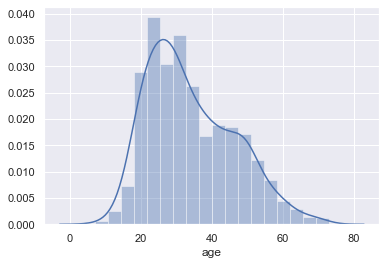

In [28]:
#your answers here
sns.distplot(user['age']);

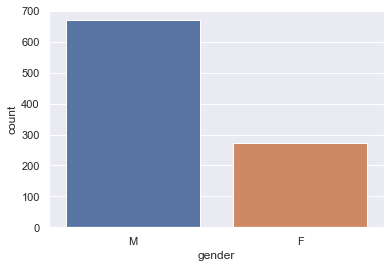

In [29]:
sns.countplot(user['gender']);

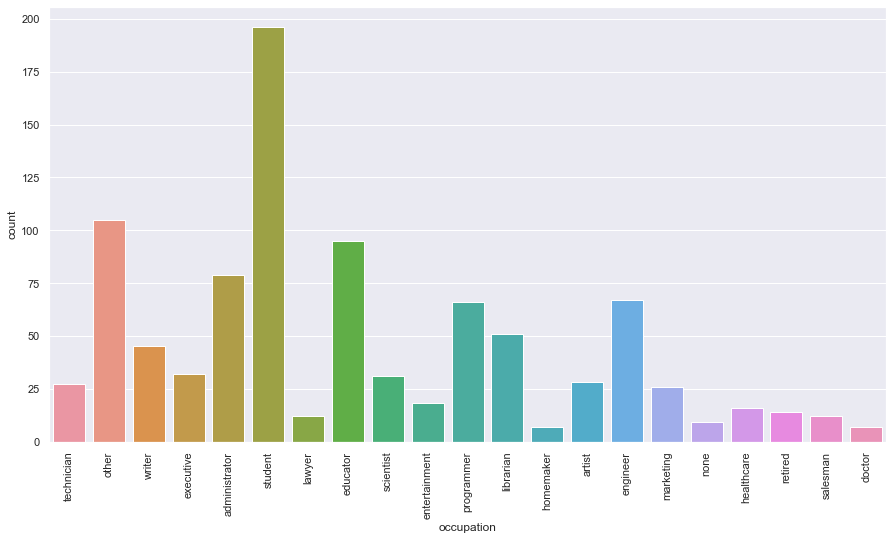

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(user['occupation'])
plt.xticks(rotation=90)
plt.show()

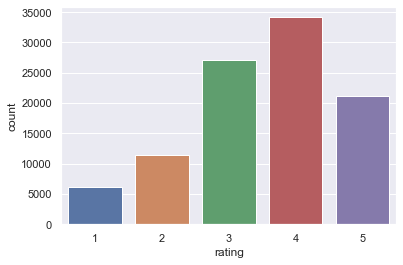

In [31]:
sns.countplot(data['rating']);

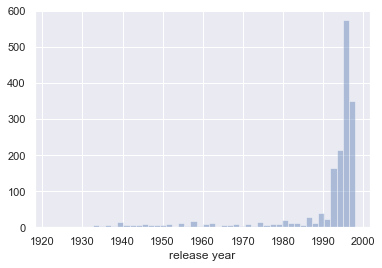

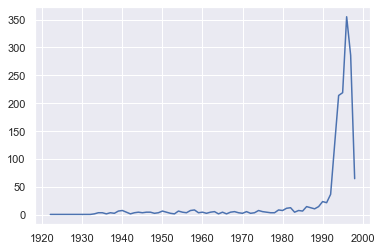

In [32]:
movie['release year'] = movie['release date'].str[-4:].astype('int')
sns.distplot(movie['release year'],kde=False)
plt.show()
print()
plt.plot(movie.groupby("release year")["release year"].count())
plt.show()


### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

In [33]:
genre_by_year = movie.groupby('release year').sum()
genre_by_year = genre_by_year.drop(columns = 'movie id').T
genre_by_year


release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
unknown,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Action,0,0,0,0,0,0,0,0,0,0,...,6,7,2,8,20,30,40,44,46,12
Adventure,0,0,0,0,0,0,0,0,0,0,...,4,1,1,1,9,13,22,24,20,3
Animation,0,0,0,0,0,0,0,0,0,1,...,0,0,1,2,1,4,6,9,3,0
Childrens,0,0,0,0,0,0,0,0,0,1,...,0,1,1,1,6,15,21,21,22,1
Comedy,0,0,0,0,0,1,2,2,1,2,...,3,6,6,12,39,82,63,108,87,13
Crime,0,0,0,1,0,0,0,0,0,0,...,1,3,0,5,7,8,11,21,30,7
Documentary,0,0,0,0,0,0,0,0,0,0,...,0,2,1,0,4,9,5,18,6,3
Drama,0,1,1,0,0,0,1,0,1,1,...,8,12,11,14,64,97,89,170,113,33
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,3,3,6,4,1


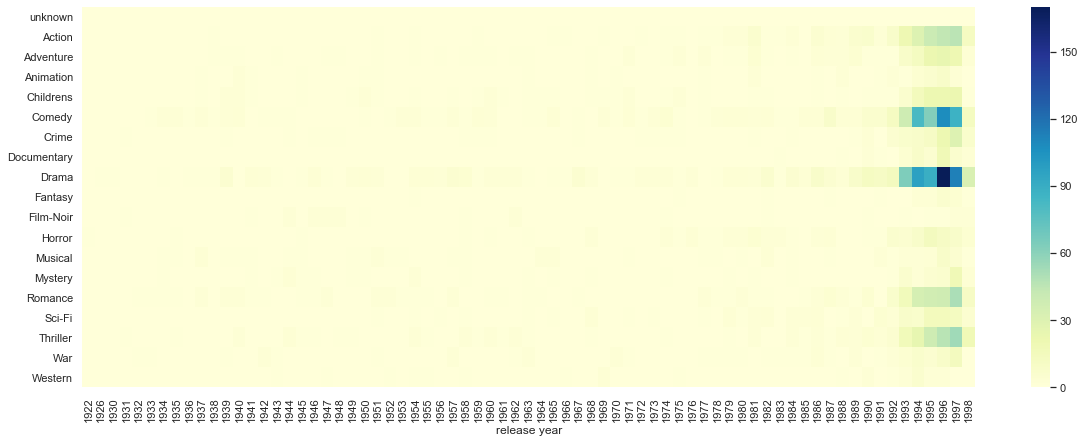

In [39]:
plt.figure(figsize=(20,7))  #setting the figure size
sns.heatmap(genre_by_year, cmap='YlGnBu')  #heat map to plot the above table
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [35]:
userdata  = user.merge(data,on='user id',how='inner')
df = movie.merge(userdata,on='movie id',how='inner')
df.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,War,Western,release year,user id,age,gender,occupation,zip code,rating,timestamp
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,1,24,M,technician,85711,5,874965758
1,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,2,53,F,other,94043,4,888550871
2,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,5,33,F,other,15213,4,875635748
3,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,6,42,M,executive,98101,4,883599478
4,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,1995,10,53,M,lawyer,90703,4,877888877


In [36]:
top_100_movies = df.groupby(['movie id','movie title'])['rating'].count().reset_index()
movie_id = list(top_100_movies[top_100_movies['rating']>100]['movie id'])
avg_rating = df.groupby(['movie id','movie title'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating[avg_rating['movie id'].isin(movie_id)].head(25)

,movie id,movie title,rating
15,408,"Close Shave, A",4.491071
16,318,Schindler's List,4.466443
17,169,"Wrong Trousers, The",4.466102
18,483,Casablanca,4.456790
20,64,"Shawshank Redemption, The",4.445230
21,603,Rear Window,4.387560
22,12,"Usual Suspects, The",4.385768
23,50,Star Wars,4.358491
24,178,12 Angry Men,4.344000
28,134,Citizen Kane,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [37]:
Genre_by_gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 
Genre_by_gender['total'] = Genre_by_gender.sum(axis = 1)
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,53701
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,158884


In [38]:
Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,10.133889,5.849053,1.852852,4.156347,15.023929,3.340720,0.348224,20.498687,0.675965,0.716933,2.229009,2.685239,2.446882,10.908549,4.895626,9.47096,4.076274,0.690862,100.0
M,12.680320,6.679087,1.642708,3.115480,13.698044,3.940611,0.359382,18.181189,0.622467,0.848418,2.593087,2.210418,2.474132,8.561592,6.357468,10.56494,4.537272,0.933385,100.0


#### Conclusion:

* 20% women watched Drama and 18% men watched Drama

* 4.8% women watched Sci-Fi and 6.3% men watched Sci-Fi

* 10.9% women watched Romance 8.6% men watched Romance

#####  Answer: All the statements were false. 